<a href="https://colab.research.google.com/github/tzoung-yu/TrueVolume/blob/main/TrueVolume%E4%B8%8A%E5%B8%82%E4%B8%8A%E6%AB%831.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.1 MB/s eta 0:00:00


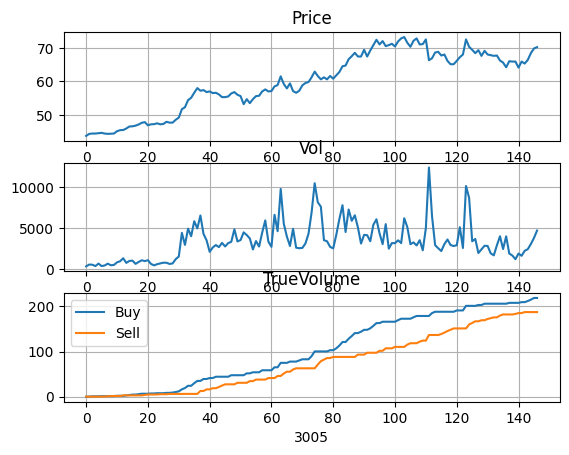

In [1]:
!pip install twstock
from twstock import Stock
import pandas as pd
import matplotlib.pyplot as plt

stoid='3005'

# 讀取股價資料
stock = Stock(stoid)                              # 擷取股價
stock.fetch_from(2023, 1)

df=stock

#計算TueVolume

opp=df.open
clo=df.close
voo=df.transaction
hig=df.high
llo=df.low
upl=[]
dol=[]
bll=[]
upc=0.0
dlc=0.0
blc=0.0
lp=0.0
for i in range(len(opp)):
  if(lp==0.0):
    lp=opp[i]
  if(opp[i]<clo[i]):
    if(clo[i] >= opp[i] + ((hig[i] - opp[i])/3) and clo[i]>=lp):
      upc+=(voo[i]/1000)
    else:
      if(clo[i] < opp[i] + ((hig[i] - opp[i])/5)):
        dlc+=(voo[i]/1000)
  else:
    if(clo[i] <= opp[i]-((opp[i]-llo[i])/4) and clo[i]<=lp):
      dlc+=(voo[i]/1000)
    """else:
      if(clo[i] > opp[i]-((opp[i] - llo[i])/5)):
        upc+=(voo[i]/1000)*2"""
  upl.append(upc)
  dol.append(dlc)
  blc+=voo[i]/1000
  bll.append(blc/2)
  lp=clo[i]

plt.subplot(311)
plt.title('Price')
plt.plot(clo)
plt.grid()

plt.subplot(312)
plt.title('Vol')
plt.plot(voo)
plt.grid()

plt.subplot(313)
plt.plot(upl, label='Buy')
plt.plot(dol, label='Sell')
#plt.plot(bll, label='On balanced')
plt.title('TrueVolume')
plt.xlabel(stoid)
plt.grid()
plt.legend()

plt.show()